In [1]:
import matplotlib.pyplot as plt
import os
import pyLDAvis
import pyLDAvis.gensim
from upskills.email_classification import preprocessing
from upskills.email_classification import model_lda
from bs4 import BeautifulSoup
from collections import defaultdict
import re
import pandas as pd
from gensim import utils
from langdetect import detect_langs
from nltk.stem import WordNetLemmatizer
import numpy as np
from stop_words import get_stop_words



C:\Users\EricJulienASKINAZI\Anaconda3\lib\site-packages\socks.py:58: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Callable
C:\Users\EricJulienASKINAZI\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
C:\Users\EricJulienASKINAZI\Anaconda3\lib\site-packages\nltk\decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\EricJulienASKINAZI\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Read emails from csv
file_name = os.path.join("../data/email_perso.csv")
full_data = pd.read_csv(file_name, encoding='latin1')
full_data = full_data[['Subject', 'Body', 'Date Sent']]

In [17]:
full_data = preprocessing.merge_emails(full_data)
full_data = preprocessing.cleaning(full_data)
full_data = preprocessing.tokenize(full_data, 2)

full_data

,Subject,Body,Date Sent,body_tokens
0,Welcome to Upskills!,"Dear Aurelien, We warmly welcome you at Upski...",14/05/2019 09:04,"[dear, aurelien, welcome, upskills, will, plea..."
1,Reminder - Upskills Brown Bag Session - Confir...,"Dear all, Just a quick reminder for our U...",13/05/2019 11:53,"[dear, just, quick, upskills, tomorrow, thank,..."
2,Canceled: Upskills Training - Fundamental Revi...,"Dear all, Please find FRTB Part 2 trainin...",13/05/2019 09:33,"[dear, please, find, part, train, follow, deta..."
3,You've been added to a team in Microsoft Teams,Microsoft Teams\t Sarah El has added you to ...,14/05/2019 11:41,"[microsoft, team, sarah, add, urecon, team, ur..."
4,"Asset Delivery Sign-off, action required","Dear Aurelien BAELDE, Following Asset has bee...",14/05/2019 12:14,"[dear, aurelien, baelde, follow, asset, assign..."
6,Scb agrees to award us the project,"Hi George, Hussam and Christophe, Great jo...",14/05/2019 16:19,"[george, hussam, christophe, job, thank, anh, ..."
7,OCBC tomorrow,"Including George. Hi Aurelien, Sure, t...",15/05/2019 17:00,"[include, george, aurelien, sure, thank, can, ..."
10,Case Study,Sent from Mail <https://go.microsoft.com...,17/05/2019 11:29,"[send, mail, https, microsoft, george, varghes..."
19,Utiliser le binary encoder pour reduire la dim...,Envoye de mon iPhone,19/05/2019 18:21,"[envoye, mon, iphone]"
20,Azure Credentials,"Hi Tuan, Thanks a lot. Yes, please limit f...",17/05/2019 19:38,"[tuan, thank, yes, please, limit, will, see, t..."


In [18]:
# turn our tokenized documents into a id <-> term dictionary
ldamodel, corpus = model_lda.train_lda(full_data)

In [19]:
ldamodel.print_topics(num_topics = 7, num_words=10)

[(0,
  '0.040*"team" + 0.034*"hussam" + 0.028*"meet" + 0.022*"fast" + 0.022*"christophe" + 0.022*"track" + 0.021*"need" + 0.020*"will" + 0.019*"monday" + 0.018*"george"'),
 (1,
  '0.052*"upskills" + 0.028*"case" + 0.021*"sarah" + 0.021*"hamidi" + 0.021*"asset" + 0.021*"laptop" + 0.019*"send" + 0.019*"varghese" + 0.019*"george" + 0.019*"employee"'),
 (2,
  '0.048*"please" + 0.036*"use" + 0.032*"email" + 0.023*"upskills" + 0.023*"office" + 0.018*"also" + 0.018*"business" + 0.018*"password" + 0.018*"skype" + 0.018*"leave"'),
 (3,
  '0.047*"aurelien" + 0.045*"thong" + 0.034*"bonjour" + 0.030*"can" + 0.024*"les" + 0.024*"mon" + 0.024*"azure" + 0.023*"deal" + 0.020*"pour" + 0.020*"many"'),
 (4,
  '0.036*"message" + 0.036*"intend" + 0.036*"information" + 0.036*"confidential" + 0.036*"notify" + 0.036*"contain" + 0.019*"mail" + 0.019*"thank" + 0.019*"receive" + 0.019*"note"'),
 (5,
  '0.033*"bank" + 0.033*"github" + 0.030*"email" + 0.025*"upskills" + 0.022*"george" + 0.020*"week" + 0.020*"saim"

In [14]:
for count, c in enumerate(ldamodel[corpus]):
    print(c)
    print("document number : {}".format(count))   
    print("------------------------------------------------------\n")

[(1, 0.9968628)]
document number : 0
------------------------------------------------------

[(1, 0.8436371), (3, 0.13168909)]
document number : 1
------------------------------------------------------

[(1, 0.98246694)]
document number : 2
------------------------------------------------------

[(1, 0.8226365), (5, 0.1633186)]
document number : 3
------------------------------------------------------

[(1, 0.99265206)]
document number : 4
------------------------------------------------------

[(2, 0.95907664)]
document number : 5
------------------------------------------------------

[(2, 0.97132456)]
document number : 6
------------------------------------------------------

[(3, 0.4605447), (5, 0.39538053), (6, 0.124975115)]
document number : 7
------------------------------------------------------

[(2, 0.94278115)]
document number : 8
------------------------------------------------------

[(2, 0.9548394)]
document number : 9
-----------------------------------------------------

In [7]:
for count, c in enumerate(ldamodel[corpus]):
    print("document number : {}".format(count))
    print(cleaned_msg[key_list[count]])
    print("Results     : ", c)
    print("------------------------------------------------------\n")

document number : 0


NameError: name 'cleaned_msg' is not defined

In [15]:
vis = pyLDAvis.gensim.prepare(topic_model=ldamodel, corpus=corpus, dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

c:\python37-32\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [16]:
ldamodel.get_document_topics(corpus[0])

[(1, 0.07767274), (4, 0.9205006)]

In [17]:
ldamodel.get_topics()

array([[0.0153997 , 0.00010922, 0.00010922, ..., 0.00010922, 0.00010922,
        0.00010922],
       [0.00016003, 0.00924661, 0.00016006, ..., 0.00015995, 0.00015995,
        0.00015995],
       [0.0163253 , 0.00016237, 0.00016237, ..., 0.00357203, 0.0012988 ,
        0.0012988 ],
       ...,
       [0.00390771, 0.00191227, 0.00107778, ..., 0.00013476, 0.00013476,
        0.00013476],
       [0.00033364, 0.00033364, 0.00033364, ..., 0.00033364, 0.00033364,
        0.00033364],
       [0.00530369, 0.00024108, 0.00024108, ..., 0.00024108, 0.00024108,
        0.00024108]], dtype=float32)

In [18]:
ldamodel.show_topics()

[(0,
  '0.021*"will" + 0.020*"need" + 0.019*"time" + 0.018*"line" + 0.016*"hussam" + 0.016*"meet" + 0.015*"access" + 0.015*"ocbc" + 0.015*"fast" + 0.015*"track"'),
 (1,
  '0.039*"email" + 0.027*"address" + 0.025*"upskills" + 0.023*"aurelien" + 0.023*"regard" + 0.020*"create" + 0.019*"team" + 0.018*"add" + 0.016*"creation" + 0.016*"adress"'),
 (2,
  '0.065*"email" + 0.040*"group" + 0.033*"please" + 0.030*"can" + 0.030*"pavilion" + 0.029*"classification" + 0.027*"aurelien" + 0.027*"george" + 0.024*"thong" + 0.022*"jeremy"'),
 (3,
  '0.051*"azure" + 0.038*"lambda" + 0.036*"thank" + 0.032*"credentials" + 0.031*"thong" + 0.026*"tuan" + 0.026*"please" + 0.023*"function" + 0.023*"can" + 0.021*"access"'),
 (4,
  '0.020*"please" + 0.017*"upskills" + 0.014*"email" + 0.011*"use" + 0.011*"case" + 0.010*"bank" + 0.010*"github" + 0.008*"discuss" + 0.008*"asset" + 0.008*"laptop"'),
 (5,
  '0.021*"sarah" + 0.021*"cluster" + 0.014*"tool" + 0.014*"root" + 0.014*"cause" + 0.014*"will" + 0.013*"find" + 0.

In [21]:
topic = 0
for count, c in enumerate(ldamodel[corpus]):
    for cc in c:
        if cc[0] == topic:
            print("document number : {}".format(count))
            print(cleaned_msg[key_list[count]])
            print("\n")
            print("Topics number      : ", c[0])
            print(ldamodel.print_topic(c[0][0]))
            print("\n")
            print("similarity index : {}".format(c[0][1]))
            print("\n")
            print(processed_msg[count])
            print("------------------------------------------------------\n")

document number : 25
Hi Aurelien,      Its impossible to get the data out of the bank.      All what we can do is that we can try to bring the algo in the bank to try it     Thanks,  Sarah      getting bank data for prototyping     Hi Sarah,     To propose improvement to the current algorithms, we will need data to test our algorithm proposal.     Yesterday, Ju Yi showed me some OCBC data (6M rows in csv files, totalling 4Gb for source and target versions) which would be clearly fine for us.     Do you know how we could get the data ?     Best regards  Aurelien  


Topics number      :  (0, 0.17815287)
0.021*"will" + 0.020*"need" + 0.019*"time" + 0.018*"line" + 0.016*"hussam" + 0.016*"meet" + 0.015*"access" + 0.015*"ocbc" + 0.015*"fast" + 0.015*"track"


similarity index : 0.1781528741121292


['aurelien', 'impossible', 'get', 'data', 'bank', 'can', 'can', 'try', 'bring', 'algo', 'bank', 'try', 'thank', 'sarah', 'get', 'bank', 'data', 'prototyping', 'sarah', 'propose', 'improvement', 

(array([1., 1., 1., 1., 5., 4., 2., 2., 0., 2., 3., 2., 1., 0., 3., 2., 0.,
        0., 1., 1., 0., 0., 0., 3., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 2., 2., 0., 0.,
        2., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 136.  ,  177.73,  219.46,  261.19,  302.92,  344.65,  386.38,
         428.11,  469.84,  511.57,  553.3 ,  595.03,  636.76,  678.49,
         720.22,  761.95,  803.68,  845.41,  887.14,  928.87,  970.6 ,
        1012.33, 1054.06, 1095.79, 1137.52, 1179.25, 1220.98, 1262.71,
        1304.44, 1346.17, 1387.9 , 1429.63, 1471.36, 1513.09, 1554.82,
        1596.55, 1638.28, 1680.01, 1721.74, 1763.47, 1805.2 , 1846.93,
        1888.66, 1930.39, 1972.12, 2013.85, 2055.58, 2097.31, 2139.04,
        2180.77, 2222.5 , 2264.23, 2305.96, 2347.69, 

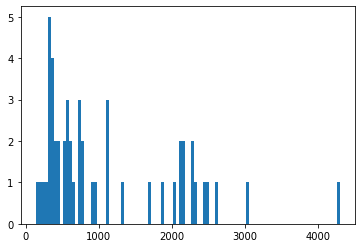

In [20]:
msg_len = [len(mess) for _, mess in cleaned_msg.items()]
plt.hist(msg_len, 100)

Minimal length of documet should be 70 character

Use of stemming might not be appropriate, lemmatization could be tested instead. 